# Length

In [1]:
import os
import pandas
import numpy as np
import pandas as pd
import re
import ast
import json
from CS_feature_extractor import *
DATA_DIR = '../data'

# Experiment Config
DF_NAME = 'GSM8K'

NUM_OF_SAMPLES = 500
NUM_OF_COT = 40
MODEL = 'gpt-3.5-turbo-0125'
storage_dir = os.path.join(DATA_DIR, f'Evaluation_CoTs/Algo_Design_Data')
hard_file_path = os.path.join(storage_dir, f'{DF_NAME}_hard.json')
easy_file_path = os.path.join(storage_dir, f'{DF_NAME}_easy.json')

In [2]:
with open(hard_file_path,'r') as f:
    data = json.load(f)
hard = pd.DataFrame(data)
hard

,id,correct answer,CoT answers,Correctness,LEN,QUA_IM,DIF_IV,DIF_SUB,SIM_COT_BIGRAM,SIM_COT_AGG,SIM_COT_PW,SIM_AC_BIGRAM,SIM_AC_AGG,SIM_AC_PW
0,0,-9867630,"[0, 9867650, 19735200, -9867630, 1973528, 1973...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Challenging Math,"[0.0, 0.8827160493827161, 0.9006211180124224, ...","[0.0, 0.8827160493827161, 0.8963414634146342, ...","[0.0, 0.8827160493827161, 0.9207052958483164, ...","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, ...","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,1,3431580,"[3431580, 3431580, 3431580, 3431580, 3431580, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[4, 4, 4, 4, 4, 4, 4, 3, 2, 4, 4, 4, 4, 2, 2, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, ...",Challenging Math,"[0.0, 0.8947368421052632, 0.6111111111111112, ...","[0.0, 0.8947368421052632, 0.6027397260273972, ...","[0.0, 0.8947368421052632, 0.6339137645107795, ...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
2,2,322886700,"[14, 14, 14, 107628900, 107628900, 14, 1076289...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, ...",Challenging Math,"[0.0, 0.9117647058823529, 1.0, 0.8676470588235...","[0.0, 0.9117647058823529, 0.948905109489051, 0...","[0.0, 0.9117647058823529, 0.9558823529411764, ...","[0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, ...","[0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, ...","[0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, ..."
3,3,-6887448,"[6887423, 6887423, 6887398, 6887398, 167, 206,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[4, 3, 3, 3, 3, 4, 5, 5, 3, 3, 5, 0, 3, 3, 3, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2, 0, 0, 5, 0, 5, 2, 5, 5, 2, 9, 10, 5, 9, 2,...",Challenging Math,"[0.0, 0.874251497005988, 0.6787564766839378, 1...","[0.0, 0.874251497005988, 0.7040816326530612, 0...","[0.0, 0.874251497005988, 0.707657808234442, 0....","[0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,4,21459061,"[21459067, 21459067, 16104295, 21459060, 16119...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[6, 4, 1, 6, 5, 6, 5, 5, 4, 5, 1, 6, 3, 6, 5, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Challenging Math,"[0.0, 0.6701570680628273, 0.4605263157894737, ...","[0.0, 0.6701570680628273, 0.4595744680851064, ...","[0.0, 0.6701570680628273, 0.41422542204568025,...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,100,"[80, 40, 100, 100, 100, 100, 100, 100, 100, 10...","[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 2, 0, 0, 0, 0, 9, 2, 2, 0, 0, 0, 0, 0, ...",Challenging Math,"[0.0, 0.7612903225806451, 0.6611111111111111, ...","[0.0, 0.7612903225806451, 0.6451612903225806, ...","[0.0, 0.7612903225806451, 0.6762345679012345, ...","[0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
496,496,23252172,"[5813096, 5813096, 5813096, 23252172, 5813098,...","[0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...","[6, 6, 6, 7, 5, 6, 7, 5, 8, 8, 7, 6, 5, 5, 5, ...","[0, 0, 0, 0, 

In [3]:
with open(easy_file_path,'r') as f:
    data = json.load(f)
easy = pd.DataFrame(data)
easy

,id,correct answer,CoT answers,Correctness,LEN,QUA_IM,DIF_IV,DIF_SUB,SIM_COT_BIGRAM,SIM_COT_AGG,SIM_COT_PW,SIM_AC_BIGRAM,SIM_AC_AGG,SIM_AC_PW
0,0,18,"[18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 18, 1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 0, 5, 0, 0, ...",Math,"[0.0, 1.0, 0.7515527950310559, 0.6987951807228...","[0.0, 0.993103448275862, 0.7469135802469136, 0...","[0.0, 1.0, 0.7515527950310559, 0.8462650602409...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,1,3,"[3, 3, 3, 5, 3, 5, 3, 3, 3, 45353, 3, 3, 3, 3,...","[1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, ...","[4, 3, 5, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, ...",Math,"[0.0, 0.7633136094674556, 0.740506329113924, 0...","[0.0, 0.7633136094674556, 0.6961325966850829, ...","[0.0, 0.7633136094674556, 0.7008087201125175, ...","[0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, ...","[0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, ...","[0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, ..."
2,2,70000,"[195000, 195000, 195000, 195000, 195000, 65000...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[4, 4, 4, 4, 4, 3, 8, 3, 8, 4, 3, 4, 4, 9, 3, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Math,"[0.0, 1.0, 0.8633540372670807, 0.8633540372670...","[0.0, 1.0, 0.8633540372670807, 0.8757763975155...","[0.0, 1.0, 0.8633540372670807, 0.9544513457556...","[0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, ...","[0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, ..."
3,3,540,"[540, 540, 540, 540, 540, 540, 540, 540, 540, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Math,"[0.0, 1.0, 1.0, 1.0, 0.9782608695652174, 1.0, ...","[0.0, 1.0, 1.0, 1.0, 0.9782608695652174, 1.0, ...","[0.0, 1.0, 1.0, 1.0, 0.9782608695652174, 0.982...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
4,4,20,"[140, 140, 35, 3, 760, 21, 20, 10, 35, 140, 35...","[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, ...","[3, 3, 3, 4, 3, 3, 4, 5, 3, 3, 3, 3, 3, 4, 3, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Math,"[0.0, 0.984375, 0.7913669064748201, 0.66279069...","[0.0, 0.984375, 0.7872340425531915, 0.67582417...","[0.0, 0.984375, 0.7921120246659814, 0.63736150...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,200,"[200, 200, 200, 200, 2400, 2400, 2400, 2400, 2...","[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, ...","[3, 3, 2, 2, 3, 3, 3, 3, 3, 2, 2, 2, 6, 3, 3, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Math,"[0.0, 0.944954128440367, 0.9166666666666666, 1...","[0.0, 0.9541284403669725, 0.9009009009009009, ...","[0.0, 0.944954128440367, 0.9256230529595015, 0...","[0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, ...","[0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...","[0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
496,496,38,"[38, 26, 10, 38, 38, 38, 38, 38, 38, 38, 10, 3...","[1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, ...","[7, 10, 1, 7, 7, 7, 2, 7, 8, 7, 1, 7, 7, 7, 7,...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",Math,"[0.0, 0.6

In [4]:
feature_li = [
 'LEN',
 'QUA_IM',
 'DIF_IV',
 # 'DIF_SUB',
 'SIM_COT_BIGRAM',
 'SIM_COT_AGG',
 'SIM_COT_PW',
 'SIM_AC_BIGRAM',
 'SIM_AC_AGG',
 'SIM_AC_PW'
  ]

# Visualize

In [5]:
import pandas as pd

def concatenate_columns(df,data_columns, outcome_column):
    # Initialize an empty dictionary to store the concatenated data
    concatenated_data = {}
    
    # Get the number of rows based on the length of the outcome column
    num_rows = len(df)
    
    # Iterate over each column
    for column in data_columns+[outcome_column]:
        # Initialize an empty list to store the concatenated values for the current column
        concatenated_values = []
        
        # Iterate over each row
        for i in range(num_rows):
            # Get the list of values for the current column and row
            values = df[column][i]
            
            # Concatenate the values into a single string
            concatenated_values += list(values)
            
        
        # Add the concatenated values to the dictionary with the column name as the key
        concatenated_data[column] = concatenated_values
        print(len(concatenated_values))
    # Add the outcome column to the concatenated data dictionary
    
    # Create a DataFrame from the concatenated data dictionary
    hard_final = pd.DataFrame(concatenated_data)
    
    return hard_final

hard_final = concatenate_columns(hard,feature_li,'Correctness')
easy_final = concatenate_columns(easy,feature_li,'Correctness')

20000
20000
20000
20000
20000
20000
20000
20000
20000
20000
20000
20000
20000
20000
20000
20000
20000
20000
20000
20000


In [6]:
hard_final

,LEN,QUA_IM,DIF_IV,SIM_COT_BIGRAM,SIM_COT_AGG,SIM_COT_PW,SIM_AC_BIGRAM,SIM_AC_AGG,SIM_AC_PW,Correctness
0,5,0,2,0.000000,0.000000,0.000000,0,0,0,0
1,5,0,0,0.882716,0.882716,0.882716,0,0,0,0
2,5,0,0,0.900621,0.896341,0.920705,0,0,0,0
3,6,0,0,0.679426,0.660633,0.667222,0,0,0,1
4,5,0,0,0.677419,0.713004,0.843339,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
19995,8,0,0,0.512397,0.395197,0.590408,0,0,0,0
19996,11,0,6,0.498305,0.567686,0.564859,0,0,0,0
19997,8,0,2,0.579125,0.453159,0.658719,0,0,0,0
19998,8,0,0,0.763948,0.440087,0.692436,0,0,0,1


In [7]:
easy_final

,LEN,QUA_IM,DIF_IV,SIM_COT_BIGRAM,SIM_COT_AGG,SIM_COT_PW,SIM_AC_BIGRAM,SIM_AC_AGG,SIM_AC_PW,Correctness
0,4,0,0,0.000000,0.000000,0.000000,0,0,0,1
1,4,0,0,1.000000,0.993103,1.000000,1,1,0,1
2,4,0,0,0.751553,0.746914,0.751553,1,1,1,1
3,4,0,0,0.698795,0.827381,0.846265,1,1,1,1
4,4,0,2,0.790123,0.869048,0.844123,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
19995,6,0,0,1.000000,0.672489,0.840616,1,1,1,1
19996,7,0,0,0.693122,0.709957,0.751778,1,1,1,1
19997,6,0,0,0.800000,0.683983,0.820704,1,1,1,1
19998,6,0,0,0.968750,0.679654,0.833924,1,1,1,1


In [8]:
from collections import Counter
print('--------------EASY--------------')
for col in easy_final.columns:
    if not col.startswith('SIM_COT_'):
        print(col, ':', Counter(easy_final[col]))
print('--------------HARD--------------')
for col in hard_final.columns:
    if not col.startswith('SIM_COT_'):
        print(col, ':', Counter(hard_final[col]))

--------------EASY--------------
LEN : Counter({3: 5224, 4: 4332, 5: 2859, 2: 2296, 6: 2293, 7: 1320, 8: 639, 9: 367, 0: 188, 10: 180, 1: 114, 11: 75, 12: 47, 13: 19, 15: 19, 14: 14, 16: 7, 21: 2, 20: 1, 17: 1, 19: 1, 100: 1, 23: 1})
QUA_IM : Counter({0: 19961, 1: 39})
DIF_IV : Counter({0: 18375, 2: 1127, 5: 279, 10: 124, 9: 83, 1: 7, 11: 3, 3: 1, 6: 1})
SIM_AC_BIGRAM : Counter({1: 14051, 0: 5949})
SIM_AC_AGG : Counter({1: 15238, 0: 4762})
SIM_AC_PW : Counter({1: 13897, 0: 6103})
Correctness : Counter({1: 14452, 0: 5548})
--------------HARD--------------
LEN : Counter({3: 4722, 4: 3671, 5: 2533, 2: 2021, 6: 1976, 0: 1971, 7: 1094, 8: 833, 9: 467, 10: 337, 11: 156, 12: 94, 13: 33, 14: 27, 1: 22, 16: 9, 15: 8, 17: 6, 19: 6, 21: 6, 18: 3, 23: 3, 20: 1, 22: 1})
QUA_IM : Counter({0: 19896, 1: 104})
DIF_IV : Counter({0: 13557, 2: 2949, 10: 1673, 5: 1219, 9: 574, 6: 13, 1: 7, 3: 4, 11: 4})
SIM_AC_BIGRAM : Counter({0: 10246, 1: 9754})
SIM_AC_AGG : Counter({1: 11566, 0: 8434})
SIM_AC_PW : Count

# Hard DF

Optimization terminated successfully.
         Current function value: 0.456681
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:            Correctness   No. Observations:                16000
Model:                          Logit   Df Residuals:                    15990
Method:                           MLE   Df Model:                            9
Date:                Tue, 23 Apr 2024   Pseudo R-squ.:                  0.3227
Time:                        14:43:40   Log-Likelihood:                -7306.9
converged:                       True   LL-Null:                       -10789.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.8573      0.091     -9.442      0.000      -1.035      -0.679
LEN              

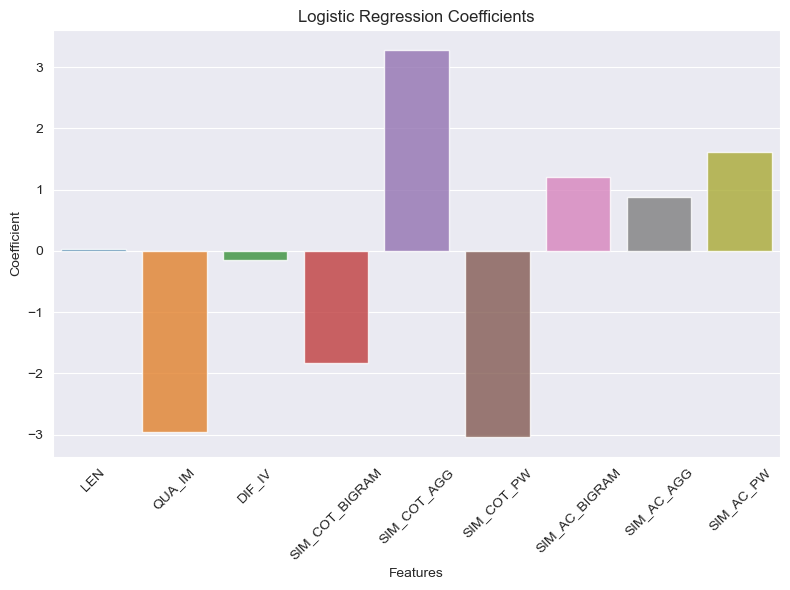

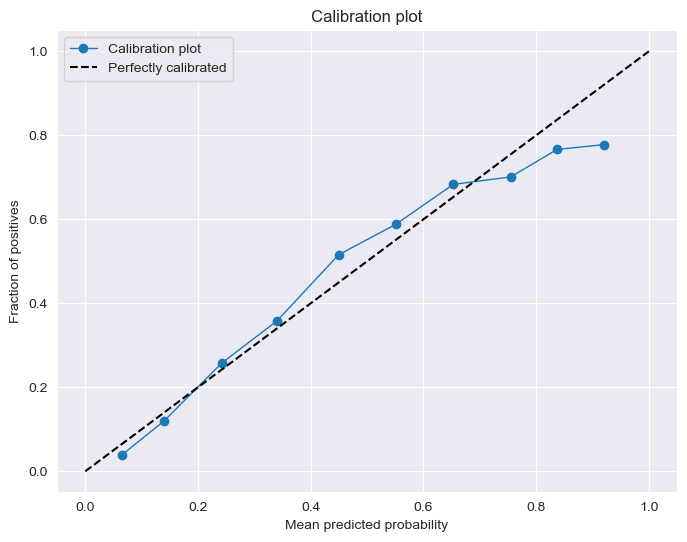

In [9]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.calibration import calibration_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, brier_score_loss, log_loss, precision_recall_curve, auc,roc_curve, confusion_matrix, classification_report, f1_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression

# Separate the features (X) and the outcome variable (y)
X = hard_final[feature_li]
y = hard_final['Correctness']



# Calculate the split index
split_idx = int(len(hard_final) * 0.8)  # 80% of the length of the dataset

# Split the data into training and test sets
X_train = hard_final[feature_li].iloc[:split_idx]
y_train = hard_final['Correctness'].iloc[:split_idx]
X_test = hard_final[feature_li].iloc[split_idx:]
y_test = hard_final['Correctness'].iloc[split_idx:]

# Add a constant term to the features for the intercept for training and testing set
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit the logistic regression model using statsmodels
model = sm.Logit(y_train, X_train)
result = model.fit()

# Print the model summary to see the coefficients and their significance
print(result.summary())

# Split the data into training and test sets
X_train = hard_final[feature_li].iloc[:split_idx]
y_train = hard_final['Correctness'].iloc[:split_idx]
X_test = hard_final[feature_li].iloc[split_idx:]
y_test = hard_final['Correctness'].iloc[split_idx:]

# Initialize and fit the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Print the model coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Make predictions on the test data (predicting probabilities)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Calculate the AUROC
auroc = roc_auc_score(y_test, y_pred_proba)
print(f"The AUROC score is: {auroc}")

# Visualize the coefficients and their significance using a bar plot
coef_df = pd.DataFrame({'Coefficient': model.coef_[0]}, index=X_train.columns)
plt.figure(figsize=(8, 6))
sns.barplot(x=coef_df.index, y=coef_df['Coefficient'], alpha=0.8)
plt.title('Logistic Regression Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calibration plot
prob_true, prob_pred = calibration_curve(y_test, y_pred_proba, n_bins=10)
plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', linewidth=1, label='Calibration plot')
plt.plot([0, 1], [0, 1], 'k--', label='Perfectly calibrated')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration plot')
plt.legend()
plt.show()

The AUROC score is: 0.8244219019851559
The Brier score is: 0.16890348906917804
Log Loss is: 0.5726870814372775


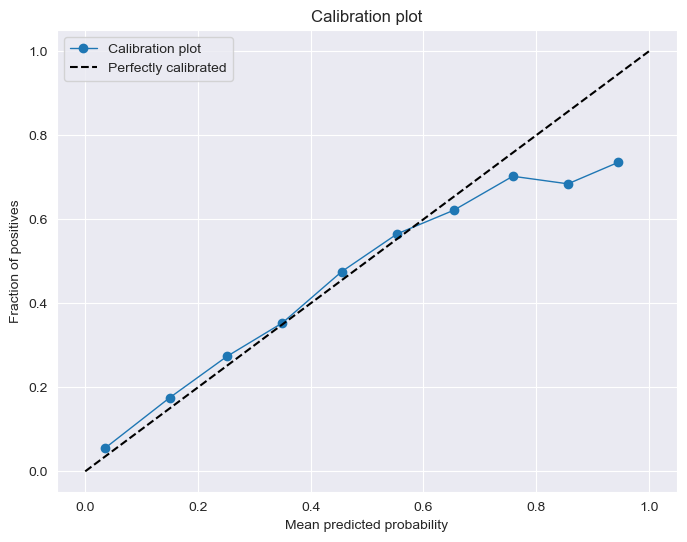

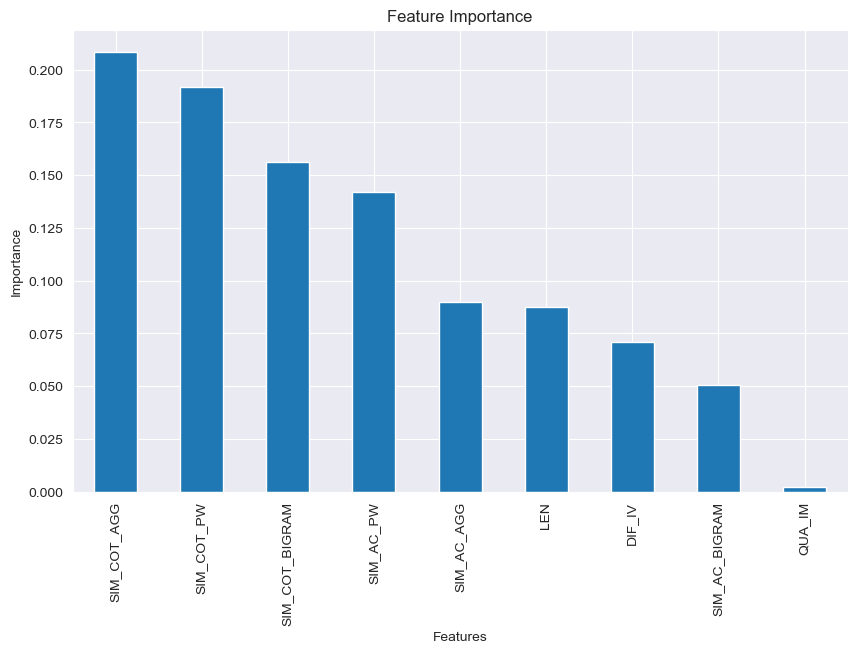

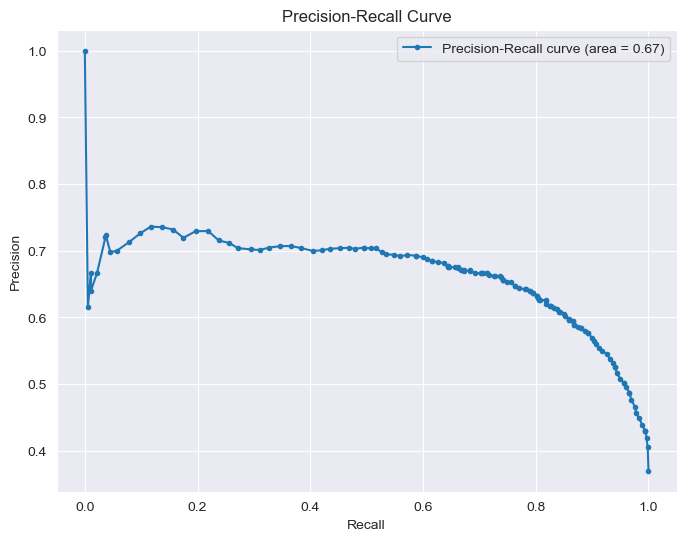

In [10]:
# Initialize and fit the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test data (predicting probabilities for the class of interest)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Assuming '1' is the positive class

# Metrics
auroc = roc_auc_score(y_test, y_pred_proba)
brier = brier_score_loss(y_test, y_pred_proba)
logloss = log_loss(y_test, y_pred_proba)
print(f"The AUROC score is: {auroc}")
print(f"The Brier score is: {brier}")
print(f"Log Loss is: {logloss}")

# Calibration plot
prob_true, prob_pred = calibration_curve(y_test, y_pred_proba, n_bins=10)
plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', linewidth=1, label='Calibration plot')
plt.plot([0, 1], [0, 1], 'k--', label='Perfectly calibrated')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration plot')
plt.legend()
plt.show()

# Feature Importance
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

# Precision-Recall Curve and AUC
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label=f'Precision-Recall curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

W:\anaconda3\envs\llm_hall_project\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
W:\anaconda3\envs\llm_hall_project\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
W:\anaconda3\envs\llm_hall_project\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
W:\anaconda3\envs\llm_hall_project\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
W:\anaconda3\envs\llm_hall_project\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore

AUROC Score: 0.8487881030568758
Best Threshold: 0.3264582596415439
Confusion Matrix:
[[1878  641]
 [ 222 1259]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.75      0.81      2519
           1       0.66      0.85      0.74      1481

    accuracy                           0.78      4000
   macro avg       0.78      0.80      0.78      4000
weighted avg       0.81      0.78      0.79      4000


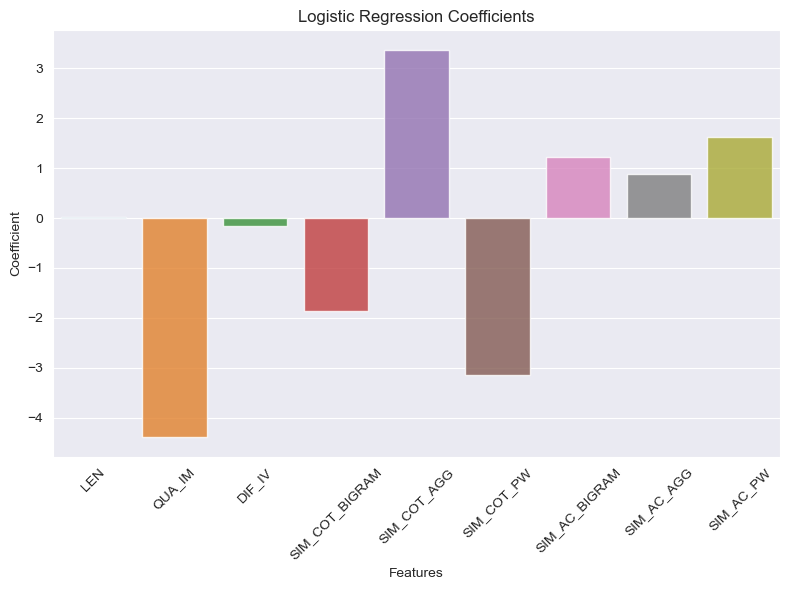

In [11]:
# Setting up the logistic regression model
log_reg = LogisticRegression()

# Using GridSearchCV to optimize hyperparameters
param_grid = {
    'C': np.logspace(-4, 4, 10),  # Regularization parameter
    'solver': ['liblinear', 'saga'],  # Different solvers
    'penalty': ['l1', 'l2', 'none'],  # Regularization types
}

clf = GridSearchCV(log_reg, param_grid, cv=5, scoring='neg_log_loss', refit=True)
clf.fit(X_train, y_train)

# Best model
model = clf.best_estimator_

# Predict probabilities
y_probs = model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)
print(f'AUROC Score: {auc_score}')

# Finding the best cutoff value
f1_scores = [f1_score(y_test, y_probs > thresh) for thresh in thresholds]
best_thresh = thresholds[np.argmax(f1_scores)]
print(f'Best Threshold: {best_thresh}')

# Predict using the best threshold
y_pred = (y_probs >= best_thresh).astype(int)

# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plotting the coefficients
coefficients = pd.Series(model.coef_[0], index=X.columns)
plt.figure(figsize=(8, 6))
sns.barplot(x=coefficients.index, y=coefficients.values, alpha=0.8)
plt.title('Logistic Regression Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Easy

Optimization terminated successfully.
         Current function value: 0.337592
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:            Correctness   No. Observations:                16000
Model:                          Logit   Df Residuals:                    15990
Method:                           MLE   Df Model:                            9
Date:                Tue, 23 Apr 2024   Pseudo R-squ.:                  0.4261
Time:                        14:44:06   Log-Likelihood:                -5401.5
converged:                       True   LL-Null:                       -9411.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3091      0.105      2.942      0.003       0.103       0.515
LEN              

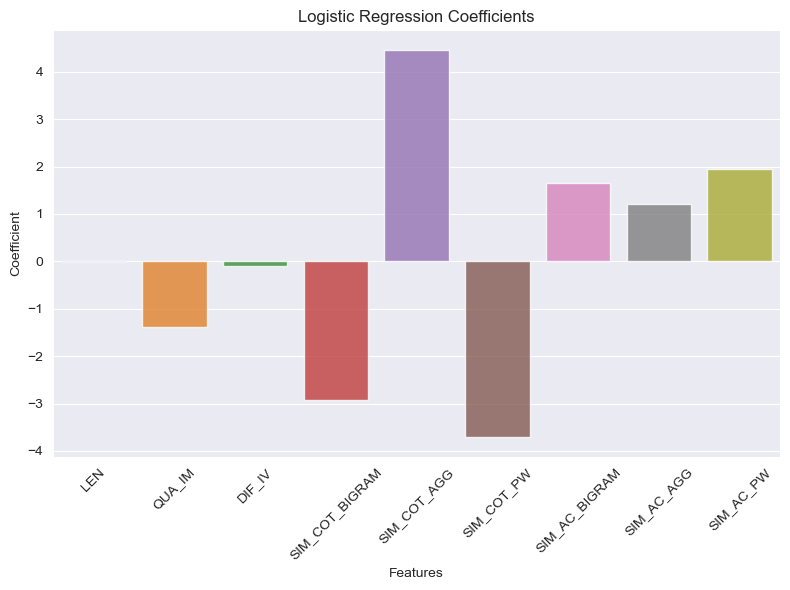

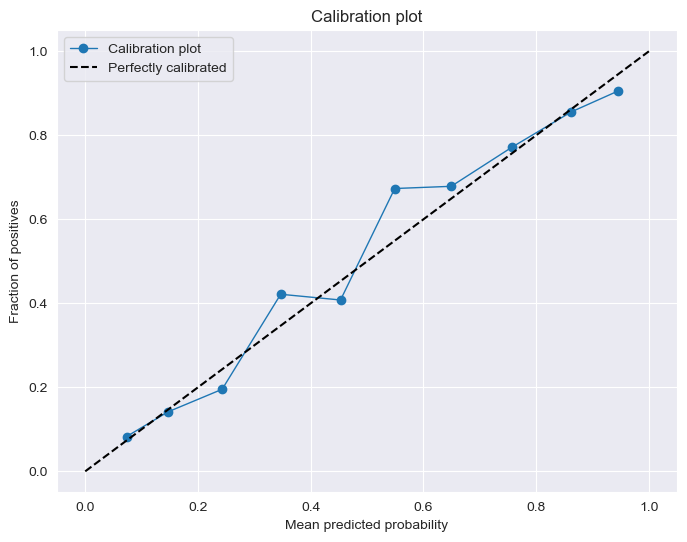

In [12]:
X = easy_final[feature_li]
y = easy_final['Correctness']



# Calculate the split index
split_idx = int(len(easy_final) * 0.8)  # 80% of the length of the dataset

# Split the data into training and test sets
X_train = easy_final[feature_li].iloc[:split_idx]
y_train = easy_final['Correctness'].iloc[:split_idx]
X_test = easy_final[feature_li].iloc[split_idx:]
y_test = easy_final['Correctness'].iloc[split_idx:]

# Add a constant term to the features for the intercept for training and testing set
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit the logistic regression model using statsmodels
model = sm.Logit(y_train, X_train)
result = model.fit()

# Print the model summary to see the coefficients and their significance
print(result.summary())

# Split the data into training and test sets
X_train = easy_final[feature_li].iloc[:split_idx]
y_train = easy_final['Correctness'].iloc[:split_idx]
X_test = easy_final[feature_li].iloc[split_idx:]
y_test = easy_final['Correctness'].iloc[split_idx:]

# Initialize and fit the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Print the model coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# Make predictions on the test data (predicting probabilities)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Calculate the AUROC
auroc = roc_auc_score(y_test, y_pred_proba)
print(f"The AUROC score is: {auroc}")

# Visualize the coefficients and their significance using a bar plot
coef_df = pd.DataFrame({'Coefficient': model.coef_[0]}, index=X_train.columns)
plt.figure(figsize=(8, 6))
sns.barplot(x=coef_df.index, y=coef_df['Coefficient'], alpha=0.8)
plt.title('Logistic Regression Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Calibration plot
prob_true, prob_pred = calibration_curve(y_test, y_pred_proba, n_bins=10)
plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', linewidth=1, label='Calibration plot')
plt.plot([0, 1], [0, 1], 'k--', label='Perfectly calibrated')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration plot')
plt.legend()
plt.show()

The AUROC score is: 0.8421831315389877
The Brier score is: 0.12331087334584154
Log Loss is: 0.7826264544855758


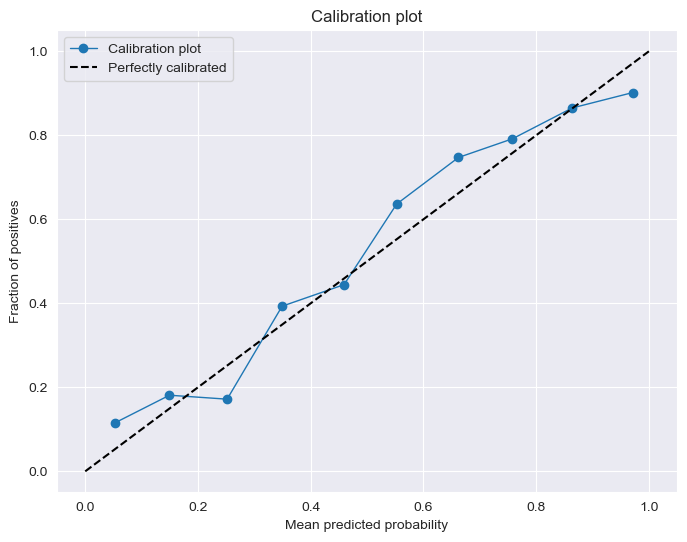

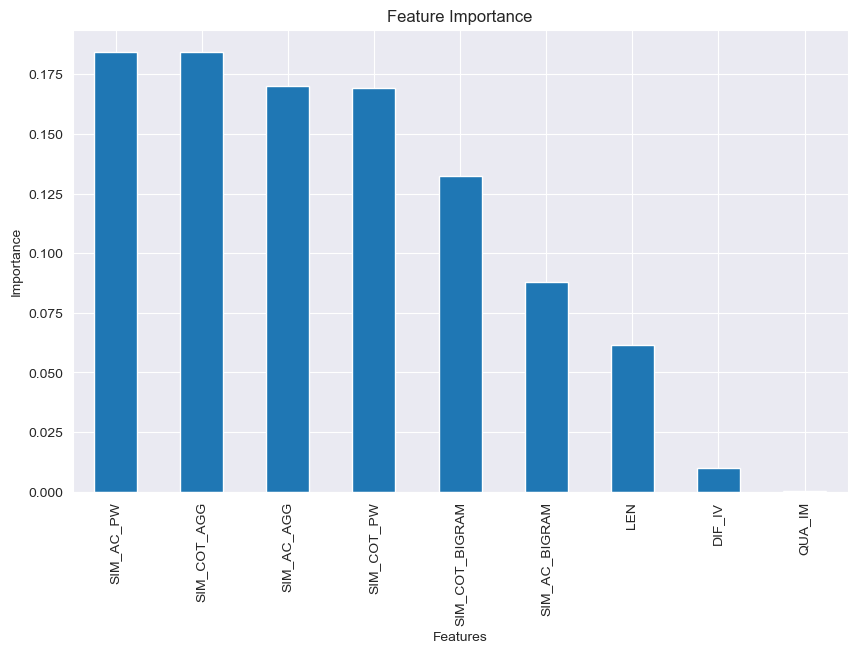

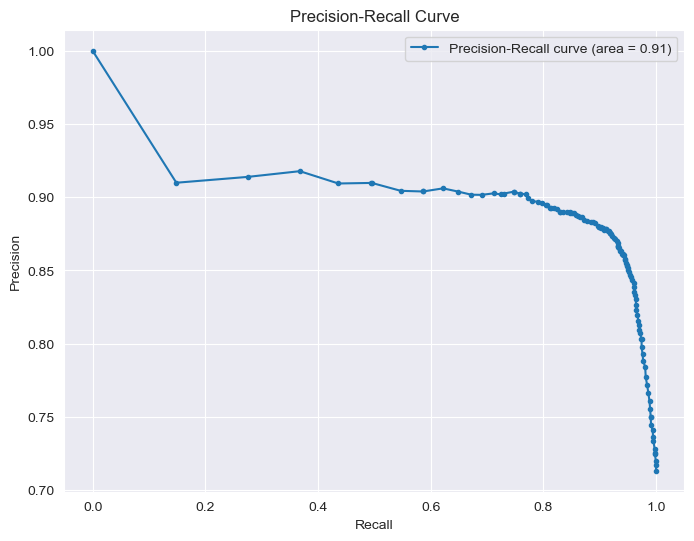

In [13]:
# Initialize and fit the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test data (predicting probabilities for the class of interest)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Assuming '1' is the positive class

# Metrics
auroc = roc_auc_score(y_test, y_pred_proba)
brier = brier_score_loss(y_test, y_pred_proba)
logloss = log_loss(y_test, y_pred_proba)
print(f"The AUROC score is: {auroc}")
print(f"The Brier score is: {brier}")
print(f"Log Loss is: {logloss}")

# Calibration plot
prob_true, prob_pred = calibration_curve(y_test, y_pred_proba, n_bins=10)
plt.figure(figsize=(8, 6))
plt.plot(prob_pred, prob_true, marker='o', linewidth=1, label='Calibration plot')
plt.plot([0, 1], [0, 1], 'k--', label='Perfectly calibrated')
plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')
plt.title('Calibration plot')
plt.legend()
plt.show()

# Feature Importance
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10, 6))
plt.title('Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

# Precision-Recall Curve and AUC
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
pr_auc = auc(recall, precision)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label=f'Precision-Recall curve (area = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

W:\anaconda3\envs\llm_hall_project\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
W:\anaconda3\envs\llm_hall_project\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
W:\anaconda3\envs\llm_hall_project\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
W:\anaconda3\envs\llm_hall_project\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
W:\anaconda3\envs\llm_hall_project\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore

AUROC Score: 0.8524464222032148
Best Threshold: 0.44554793332279896
Confusion Matrix:
[[ 738  409]
 [ 163 2690]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.64      0.72      1147
           1       0.87      0.94      0.90      2853

    accuracy                           0.86      4000
   macro avg       0.84      0.79      0.81      4000
weighted avg       0.85      0.86      0.85      4000


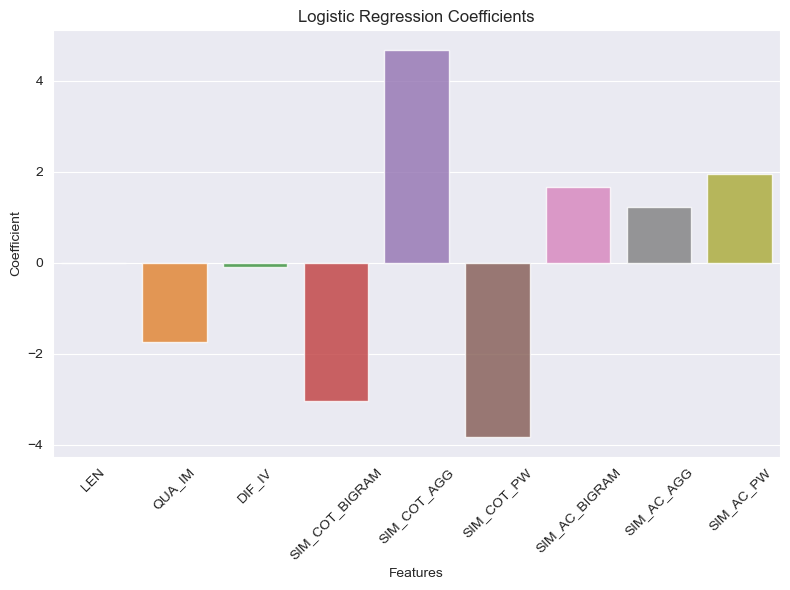

In [14]:
# Setting up the logistic regression model
log_reg = LogisticRegression()

# Using GridSearchCV to optimize hyperparameters
param_grid = {
    'C': np.logspace(-4, 4, 10),  # Regularization parameter
    'solver': ['liblinear', 'saga'],  # Different solvers
    'penalty': ['l1', 'l2', 'none'],  # Regularization types
}

clf = GridSearchCV(log_reg, param_grid, cv=5, scoring='neg_log_loss', refit=True)
clf.fit(X_train, y_train)

# Best model
model = clf.best_estimator_

# Predict probabilities
y_probs = model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)
print(f'AUROC Score: {auc_score}')

# Finding the best cutoff value
f1_scores = [f1_score(y_test, y_probs > thresh) for thresh in thresholds]
best_thresh = thresholds[np.argmax(f1_scores)]
print(f'Best Threshold: {best_thresh}')

# Predict using the best threshold
y_pred = (y_probs >= best_thresh).astype(int)

# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plotting the coefficients
coefficients = pd.Series(model.coef_[0], index=X.columns)
plt.figure(figsize=(8, 6))
sns.barplot(x=coefficients.index, y=coefficients.values, alpha=0.8)
plt.title('Logistic Regression Coefficients')
plt.xlabel('Features')
plt.ylabel('Coefficient')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
